In [108]:
import csv
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import math

In [109]:
initial = pd.read_csv('C:/users/rustym/documents/github/patchseq_gdoc_analysis/patch_seq_log_mouse.csv')

In [110]:
ps = initial[['Date', 'Post patch?', 'Post patch pipette R']]
ps['Date'] = pd.to_datetime(ps['Date'], format = '%y%m%d')
ps.dropna(subset=['Post patch?'], inplace=True)
ps.head()

C:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Date,Post patch?,Post patch pipette R
0,2017-01-04,Outside-Out,NaN
1,2017-01-04,No-Seal,NaN
2,2017-01-04,No-Seal,NaN
3,2017-01-04,No-Seal,NaN
4,2017-01-04,Outside-Out,NaN


In [111]:
def nucleated(x):
    nucleus = x[(x["Post patch?"] == "Nucleated") | (((x["Post patch?"] == "nucleus_visible") | (x["Post patch?"] == "nucleus_present")) & (x["Post patch pipette R"] >= 500))]
    return nucleus

def partial_nucleated(y):
    partial = y[(y["Post patch?"] == 'Partial-Nucleus') | (((y['Post patch?'] == 'nucleus_present') | (y['Post patch?'] == 'nucleus_visible')) & (y["Post patch pipette R"] <= 499))]
    return partial

def outside_out(z):
    outside = z[(z["Post patch?"] == 'Outside-Out') | (((z['Post patch?'] == 'nucleus_absent') | (z['Post patch?'] == 'no_nuclues_visible')) & (z['Post patch pipette R'] >= 500))]
    return outside

def no_seal(w): 
    no = w[(w["Post patch?"] == 'No-Seal') | (((w['Post patch?'] == 'nucleus_absent') | (w['Post patch?'] == 'no_nucleus_visible')) & (w['Post patch pipette R'] <= 499))]
    return no
    
def entire_cell(v):
    entire = v[(v["Post patch?"] == 'Entire-Cell') | (v['Post patch?'] == 'entire_cell')]
    return entire

In [112]:
nuc = nucleated(ps)
nuc["post patch class"] = "a.Nucleated"
part_nuc = partial_nucleated(ps)
part_nuc["post patch class"] = "b.Partial nucleated"
out_out = outside_out(ps)
out_out["post patch class"] = "c.Outside out"
noSeal = no_seal(ps)
noSeal["post patch class"] = "d.No seal"
#entirecell = entire_cell(ps)
#entirecell['post patch class'] = "e.Entire cell"

C:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org

In [116]:
frames = [nuc, part_nuc, out_out, noSeal]
result = pd.concat(frames)
result.head()

,Date,Post patch?,Post patch pipette R,post patch class
5,2017-01-04,Nucleated,NaN,a.Nucleated
9,2017-01-04,Nucleated,NaN,a.Nucleated
11,2017-01-04,Nucleated,NaN,a.Nucleated
13,2017-01-04,Nucleated,NaN,a.Nucleated
32,2017-01-05,Nucleated,NaN,a.Nucleated


In [94]:
result = result.drop('Post patch pipette R',1)

In [95]:
ps2 = result.groupby(['Date', 'post patch class']).count()
ps2 = ps2.reset_index()
ps2 = ps2.pivot_table(values=['Post patch?'],
                      index=['Date'],
                      columns=['post patch class'],
                      aggfunc='sum', fill_value=0)
ps3 = ps2.div(ps2.sum(1), axis=0)*100
ps3.head()

Post patch?                                             
post patch class a.Nucleated b.Partial nucleated c.Outside out  d.No seal
Date                                                                     
2017-01-04         33.333333            0.000000     41.666667  25.000000
2017-01-05         12.500000           12.500000     56.250000  18.750000
2017-01-06         20.000000           13.333333     40.000000  26.666667
2017-01-09          0.000000            0.000000    100.000000   0.000000
2017-01-10          0.000000            0.000000     83.333333  16.666667

In [96]:
dates = sorted(list(result.Date.unique()))
nucs = list(ps3['Post patch?', 'a.Nucleated'])
part = list(ps3['Post patch?', 'b.Partial nucleated'])
out = list(ps3['Post patch?', 'c.Outside out'])
no = list(ps3['Post patch?', 'd.No seal'])
groups = len(dates)
index = np.arange(groups)

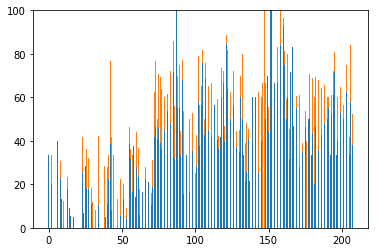

In [121]:
barWidth=0.5
fig, ax = plt.subplots()
nuc = plt.bar(index, nucs, width=barWidth)
part = plt.bar(index, part, bottom=nucs, width=barWidth)

AttributeError: 'list' object has no attribute 'ax'

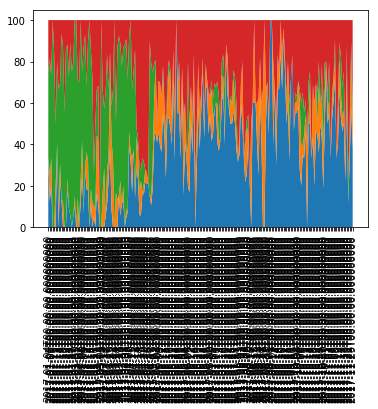

In [105]:
fig, ax = plt.subplots()
y = [nucs, part, out, no]
area_plot = plt.stackplot(index,y)
plt.xticks(index, dates, rotation=90)
ax = plt.gca()
for dates in area_plot.ax.xaxis.get_ticklabels()[::2]:
    dates.set_visible(False)
plt.tight_layout()